In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os.path as p
from pathlib import Path

experiment_names = [
  'lesion_isic_rgb',
  'lesion_isic_strat_rgb',
]

Text(0, 0.5, 'Dice')

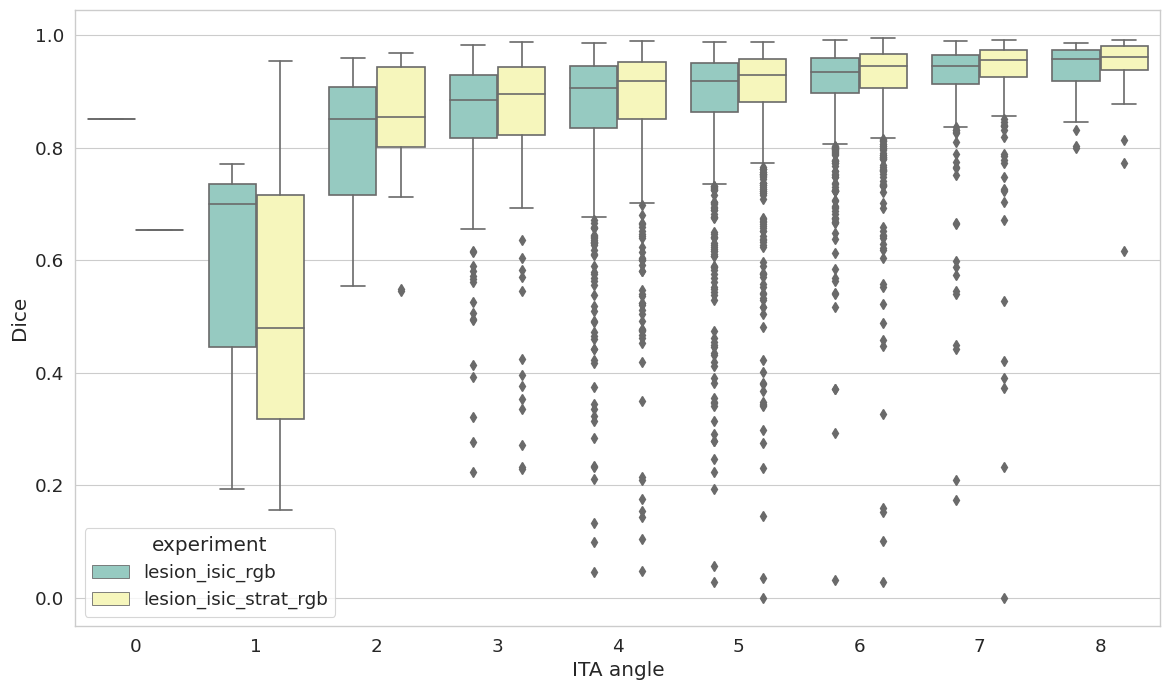

In [15]:
dfs = [pd.read_csv(p.join('predictions', experiment_name, 'metrics.csv')) for experiment_name in experiment_names]
colors = pd.read_csv('data/lesion/dominant_colors.csv')
colors['image'] = colors['image'].apply(lambda x: x.split('.')[0])
colors = colors.set_index('image')
ita_angle = colors.loc[dfs[0]['subject'].values, 'ita_angle'].values
ita_ranges = np.arange(20, 60, 5)
ita_bins = np.digitize(ita_angle, ita_ranges, right=True)

for df, name in zip(dfs, experiment_names):
  df['ita_angle'] = ita_angle
  df['ita_bins'] = ita_bins
  df['experiment'] = name

df = pd.concat(dfs)
# paired box plot per bin
fig = plt.figure(figsize=(14, 8))
sns.boxplot(x="ita_bins", y="dsc", hue="experiment", data=df, palette="Set3")
plt.xlabel('ITA angle')
plt.ylabel('Dice')